## Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

### Длительность времени между первым и последним замером температуры.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd
data_arc = pd.read_csv('datasets/final_steel/data_arc.csv')
data_bulk = pd.read_csv('datasets/final_steel/data_bulk.csv')
data_bulk_time = pd.read_csv('datasets/final_steel/data_bulk_time.csv')
data_gas = pd.read_csv('datasets/final_steel/data_gas.csv')
data_temp = pd.read_csv('datasets/final_steel/data_temp.csv')
data_wire = pd.read_csv('datasets/final_steel/data_wire.csv')
data_wire_time = pd.read_csv('datasets/final_steel/data_wire_time.csv')
display(data_wire_time)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3076,3237,2019-08-31 22:50:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,2019-08-31 23:38:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,2019-09-01 01:50:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,2019-09-01 03:12:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_temp.isna().sum()

key                0
Время замера       0
Температура     2901
dtype: int64

***Есть пропусщенные значения в стобце Температура.Это таргет поэтому просто удаляем. Это не удачные процессы и заменить их нечем***

In [5]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


***Много пропущенных значений и типы данных в некоторых стобцах указаны не верно. Так же есть проблемы с названиями столбцов***

In [6]:
data_temp = data_temp.rename(columns = {'Время замера':'time', 'Температура': 'temp'}, inplace = False)

***Заменяю названия столбцов что-бы было удобней работать***

In [7]:
data_temp['time'] = pd.to_datetime(data_temp['time'], format='%Y-%m-%dT%H:%M:%S')

***Меняем тип данных так как это столбец с датами***

In [8]:
data_time = data_temp[['time', 'key']]

In [9]:
df_max = (data_time[data_time.groupby('key').time.transform('max') == data_time['time']]).reset_index(drop=True)
df_min = (data_time[data_time.groupby('key').time.transform('min') == data_time['time']]).reset_index(drop=True)
time_df = df_min.merge(df_max, on = 'key') 
time_df['fin_time'] = time_df['time_y'] - time_df['time_x']

In [10]:
time_df

,time_x,key,time_y,fin_time
0,2019-05-03 11:16:18,1,2019-05-03 11:30:39,00:14:21
1,2019-05-03 11:37:27,2,2019-05-03 11:59:12,00:21:45
2,2019-05-03 12:13:17,3,2019-05-03 12:34:57,00:21:40
3,2019-05-03 12:52:57,4,2019-05-03 12:59:25,00:06:28
4,2019-05-03 13:23:19,5,2019-05-03 13:36:01,00:12:42
...,...,...,...,...
3211,2019-08-31 22:44:04,3237,2019-08-31 23:05:43,00:21:39
3212,2019-08-31 23:30:31,3238,2019-08-31 23:43:00,00:12:29
3213,2019-09-01 01:31:47,3239,2019-09-01 02:24:15,00:52:28
3214,2019-09-01 02:39:01,3240,2019-09-01 03:35:16,00:56:15


***Датафрейм с данными о первом и последнем замере температуры.***

In [11]:
time_df['first_to_last'] = time_df['fin_time'].astype('int64') / 1000000000

In [12]:
time_df.tail(10) 

,time_x,key,time_y,fin_time,first_to_last
3206,2019-08-31 19:55:53,3232,2019-08-31 20:17:12,00:21:19,1279.0
3207,2019-08-31 20:24:14,3233,2019-08-31 20:47:24,00:23:10,1390.0
3208,2019-08-31 20:54:17,3234,2019-08-31 21:15:28,00:21:11,1271.0
3209,2019-08-31 21:31:47,3235,2019-08-31 22:00:25,00:28:38,1718.0
3210,2019-08-31 22:08:13,3236,2019-08-31 22:31:42,00:23:29,1409.0
3211,2019-08-31 22:44:04,3237,2019-08-31 23:05:43,00:21:39,1299.0
3212,2019-08-31 23:30:31,3238,2019-08-31 23:43:00,00:12:29,749.0
3213,2019-09-01 01:31:47,3239,2019-09-01 02:24:15,00:52:28,3148.0
3214,2019-09-01 02:39:01,3240,2019-09-01 03:35:16,00:56:15,3375.0
3215,2019-09-01 04:03:30,3241,2019-09-01 04:38:08,00:34:38,2078.0


In [13]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   time_x         3216 non-null   datetime64[ns] 
 1   key            3216 non-null   int64          
 2   time_y         3216 non-null   datetime64[ns] 
 3   fin_time       3216 non-null   timedelta64[ns]
 4   first_to_last  3216 non-null   float64        
dtypes: datetime64[ns](2), float64(1), int64(1), timedelta64[ns](1)
memory usage: 150.8 KB


Text(0.5, 1.0, 'Какое самое частое время измерения')

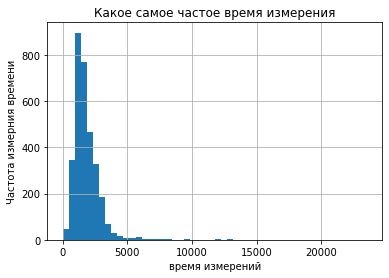

In [14]:
import matplotlib.pyplot as plt
time_df['first_to_last'].hist(bins=50)

plt.xlabel('время измерений')
plt.ylabel('Частота измерния времени')
plt.title('Какое самое частое время измерения')

In [15]:
print('Средние-', time_df['first_to_last'].mean(),'\n')
print('Минимальные-', time_df['first_to_last'].min(),'\n')
print('Максимальные значения-', time_df['first_to_last'].max(),'\n')
print('Медиана-', time_df['first_to_last'].median(),'\n')
print('Величины 25%- и 75%-квартилей:')
print(time_df['first_to_last'].quantile([0.25, 0.5, 0.75, 1])) #50%-ый квантиль == медиане

Средние- 1839.8616293532339 

Минимальные- 0.0 

Максимальные значения- 23537.0 

Медиана- 1581.0 

Величины 25%- и 75%-квартилей:
0.25     1177.0
0.50     1581.0
0.75     2235.0
1.00    23537.0
Name: first_to_last, dtype: float64


- Можно сделать вывод, что в среднем время обработки стали это 25 - 30 минуты. 
- Хотя есть и нулевые значения. Мне кажется это выбросы. 
- Так же есть цикл обработки который длиться почти 7 часов.

In [16]:
time_df = time_df.drop(['fin_time'], axis=1)
time_df = time_df.rename(columns = {'time_y':'time'}, inplace = False)

In [17]:
time_df = time_df.merge(data_temp, on = 'time') 
time_df = time_df.drop(['key_y', 'time'] , axis=1)
time_df = time_df.rename(columns = {'key_x':'key', 'time_x':'time', 'temp':'temp_fin'}, inplace = False)
time_df = time_df.merge(data_temp, on = 'time') 
time_df = time_df.drop(['key_y', 'time'] , axis=1)
time_df = time_df.rename(columns = {'key_x':'key', 'temp':'temp_start'}, inplace = False)
time_df.dropna(inplace = True)
time_df

,key,first_to_last,temp_fin,temp_start
0,1,861.0,1613.0,1571.0
1,2,1305.0,1602.0,1581.0
2,3,1300.0,1599.0,1596.0
3,4,388.0,1625.0,1601.0
4,5,762.0,1602.0,1576.0
...,...,...,...,...
2472,2495,1137.0,1591.0,1570.0
2473,2496,1618.0,1591.0,1554.0
2474,2497,717.0,1589.0,1571.0
2475,2498,1302.0,1594.0,1591.0


In [18]:
time_df

,key,first_to_last,temp_fin,temp_start
0,1,861.0,1613.0,1571.0
1,2,1305.0,1602.0,1581.0
2,3,1300.0,1599.0,1596.0
3,4,388.0,1625.0,1601.0
4,5,762.0,1602.0,1576.0
...,...,...,...,...
2472,2495,1137.0,1591.0,1570.0
2473,2496,1618.0,1591.0,1554.0
2474,2497,717.0,1589.0,1571.0
2475,2498,1302.0,1594.0,1591.0


### Суммарное время нагрева электродами, то есть сумма значений по всем промежуткам между запусками нагрева электродов.

In [19]:
data_arc

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768


In [20]:
data_arc.isna().sum()

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

In [21]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


***Пропусков нет, но значения столбцов надо поменять.***

In [22]:
data_arc = data_arc.rename(columns = {'Начало нагрева дугой':'arc_heating_start', 'Конец нагрева дугой': 'arc_heating_end',
                                        'Активная мощность': 'active_power', 'Реактивная мощность': 'reactive_power'}, inplace = False)

In [ ]:
data_arc['reactive_power'][data_arc['reactive_power'] <= 0] = data_arc['reactive_power'][data_arc['reactive_power'] <= 0] * -1

- Заменяем отрицательное значение на положительные. Мне кажется это просто ошибка в данных.

In [23]:
data_arc['arc_heating_start'] = pd.to_datetime(data_arc['arc_heating_start'], format='%Y-%m-%dT%H:%M:%S')
data_arc['arc_heating_end'] = pd.to_datetime(data_arc['arc_heating_end'], format='%Y-%m-%dT%H:%M:%S')

In [24]:
data_arc['time_difference'] = data_arc['arc_heating_end'] - data_arc['arc_heating_start']
df_sum = data_arc.groupby(by=("key"))["time_difference"].sum()

In [25]:
df_sum = df_sum.to_frame()
df_sum['sum_electo_time'] = df_sum['time_difference'].astype('int64') / 1000000000

Text(0.5, 1.0, 'Какое самое частое cуммарное время нагрева электродами')

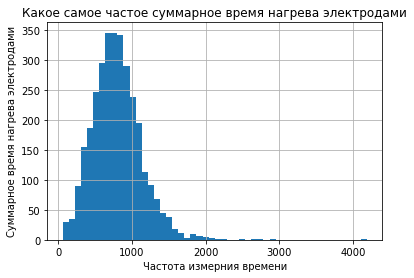

In [26]:
import matplotlib.pyplot as plt
df_sum['sum_electo_time'].hist(bins=50)

plt.xlabel('Частота измерния времени')
plt.ylabel('Суммарное время нагрева электродами')
plt.title('Какое самое частое cуммарное время нагрева электродами')

In [27]:
print('Средние-', df_sum['sum_electo_time'].mean(),'\n')
print('Минимальные-', df_sum['sum_electo_time'].min(),'\n')
print('Максимальные значения-', df_sum['sum_electo_time'].max(),'\n')
print('Медиана-', df_sum['sum_electo_time'].median(),'\n')
print('Величины 25%- и 75%-квартилей:')
print(df_sum['sum_electo_time'].quantile([0.25, 0.5, 0.75, 1])) #50%-ый квантиль == медиане

Средние- 794.5790292470442 

Минимальные- 57.0 

Максимальные значения- 4189.0 

Медиана- 770.0 

Величины 25%- и 75%-квартилей:
0.25     571.0
0.50     770.0
0.75     983.0
1.00    4189.0
Name: sum_electo_time, dtype: float64


- Среднее суммарное время нагрева электродами 13 минут.
- Максимальное это 68 минут. Думаю это не нормально, и это точно выброс. 

In [28]:
df_sum = df_sum.drop(['time_difference'], axis=1)

In [29]:
df_sum

,sum_electo_time
key,
1,1098.0
2,811.0
3,655.0
4,741.0
5,869.0
...,...
3237,909.0
3238,546.0
3239,1216.0


In [30]:
data = time_df.merge(df_sum, on = 'key') 
data

,key,first_to_last,temp_fin,temp_start,sum_electo_time
0,1,861.0,1613.0,1571.0,1098.0
1,2,1305.0,1602.0,1581.0,811.0
2,3,1300.0,1599.0,1596.0,655.0
3,4,388.0,1625.0,1601.0,741.0
4,5,762.0,1602.0,1576.0,869.0
...,...,...,...,...,...
2470,2495,1137.0,1591.0,1570.0,723.0
2471,2496,1618.0,1591.0,1554.0,940.0
2472,2497,717.0,1589.0,1571.0,569.0
2473,2498,1302.0,1594.0,1591.0,750.0


### Количество запусков нагрева электродами.

In [31]:
data_arc

,key,arc_heating_start,arc_heating_end,active_power,reactive_power,time_difference
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,00:03:48
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,00:03:05
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,00:02:52
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,00:06:05
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,00:02:28
...,...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439,00:02:37
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631,00:03:00
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654,00:03:04
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768,00:00:57


In [32]:
df_count = data_arc.groupby(by=("key"))["key"].count()
df_count = df_count.to_frame('amount')
df_count

,amount
key,
1,5
2,4
3,5
4,4
5,4
...,...
3237,5
3238,3
3239,8


Text(0.5, 1.0, 'количество запусков к частоте запусков')

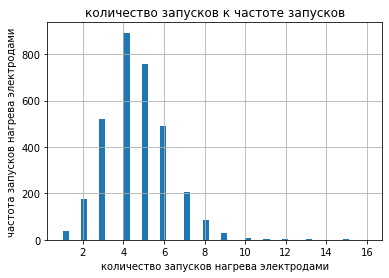

In [33]:
import matplotlib.pyplot as plt
df_count['amount'].hist(bins=50)

plt.xlabel('количество запусков нагрева электродами')
plt.ylabel('частота запусков нагрева электродами')
plt.title('количество запусков к частоте запусков')

In [34]:
print('Средние-', df_count['amount'].mean(),'\n')
print('Минимальные-', df_count['amount'].min(),'\n')
print('Максимальные значения-', df_count['amount'].max(),'\n')
print('Медиана-', df_count['amount'].median(),'\n')
print('Величины 25%- и 75%-квартилей:')
print(df_count['amount'].quantile([0.25, 0.5, 0.75, 1])) #50%-ый квантиль == медиане

Средние- 4.628500311138768 

Минимальные- 1 

Максимальные значения- 16 

Медиана- 4.0 

Величины 25%- и 75%-квартилей:
0.25     4.0
0.50     4.0
0.75     6.0
1.00    16.0
Name: amount, dtype: float64


- В среднем количество запусков 4 на один цикл
- Тут есть выбросы в виде 14 раз. Это или ошибка в занесенных данных или что-то случилось на заводе.

In [35]:
data = data.merge(df_count, on = 'key') 
data

,key,first_to_last,temp_fin,temp_start,sum_electo_time,amount
0,1,861.0,1613.0,1571.0,1098.0,5
1,2,1305.0,1602.0,1581.0,811.0,4
2,3,1300.0,1599.0,1596.0,655.0,5
3,4,388.0,1625.0,1601.0,741.0,4
4,5,762.0,1602.0,1576.0,869.0,4
...,...,...,...,...,...,...
2470,2495,1137.0,1591.0,1570.0,723.0,4
2471,2496,1618.0,1591.0,1554.0,940.0,6
2472,2497,717.0,1589.0,1571.0,569.0,3
2473,2498,1302.0,1594.0,1591.0,750.0,5


In [36]:
df_count

,amount
key,
1,5
2,4
3,5
4,4
5,4
...,...
3237,5
3238,3
3239,8


### Среднее соотношение потребления активной и реактивной мощности.

In [37]:
data_arc

,key,arc_heating_start,arc_heating_end,active_power,reactive_power,time_difference
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,00:03:48
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,00:03:05
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,00:02:52
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,00:06:05
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,00:02:28
...,...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439,00:02:37
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631,00:03:00
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654,00:03:04
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768,00:00:57


In [38]:
data_arc['active_reactive_avg'] = data_arc['active_power'] / data_arc['reactive_power']
data_arc

,key,arc_heating_start,arc_heating_end,active_power,reactive_power,time_difference,active_reactive_avg
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,00:03:48,1.420582
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,00:03:05,1.548395
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,00:02:52,1.492292
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,00:06:05,1.561504
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,00:02:28,1.671717
...,...,...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439,00:02:37,1.505675
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631,00:03:00,1.292139
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654,00:03:04,1.542928
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768,00:00:57,1.514004


In [39]:
df_avg = data_arc[['key', 'active_reactive_avg']]
df_avg

,key,active_reactive_avg
0,1,1.420582
1,1,1.548395
2,1,1.492292
3,1,1.561504
4,1,1.671717
...,...,...
14871,3241,1.505675
14872,3241,1.292139
14873,3241,1.542928
14874,3241,1.514004


In [40]:
df_avg = df_avg.groupby(['key']).mean()

Text(0.5, 1.0, 'соотношение потребления активной и реактивной мощности')

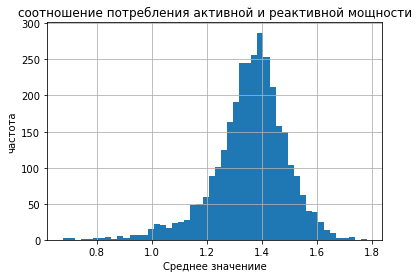

In [41]:
import matplotlib.pyplot as plt
df_avg['active_reactive_avg'].hist(bins=50)

plt.xlabel('Среднее значениие')
plt.ylabel('частота')
plt.title('соотношение потребления активной и реактивной мощности')

In [42]:
print('Средние-', df_avg['active_reactive_avg'].mean(),'\n')
print('Минимальные-', df_avg['active_reactive_avg'].min(),'\n')
print('Максимальные значения-', df_avg['active_reactive_avg'].max(),'\n')
print('Медиана-', df_avg['active_reactive_avg'].median(),'\n')
print('Величины 25%- и 75%-квартилей:')
print(df_avg['active_reactive_avg'].quantile([0.25, 0.5, 0.75, 1])) #50%-ый квантиль == медиане

Средние- 1.3574518390271353 

Минимальные- 0.6761056039759106 

Максимальные значения- 1.7821643754955452 

Медиана- 1.370550312324632 

Величины 25%- и 75%-квартилей:
0.25    1.292892
0.50    1.370550
0.75    1.438292
1.00    1.782164
Name: active_reactive_avg, dtype: float64


- ***Я не заметил тут анамалий. Думаю что тут исключать ничего не надо.***

In [43]:
data = data.merge(df_avg, on = 'key') 
data

,key,first_to_last,temp_fin,temp_start,sum_electo_time,amount,active_reactive_avg
0,1,861.0,1613.0,1571.0,1098.0,5,1.538898
1,2,1305.0,1602.0,1581.0,811.0,4,1.551834
2,3,1300.0,1599.0,1596.0,655.0,5,1.583120
3,4,388.0,1625.0,1601.0,741.0,4,1.563487
4,5,762.0,1602.0,1576.0,869.0,4,1.480428
...,...,...,...,...,...,...,...
2470,2495,1137.0,1591.0,1570.0,723.0,4,1.372734
2471,2496,1618.0,1591.0,1554.0,940.0,6,1.491059
2472,2497,717.0,1589.0,1571.0,569.0,3,1.192036
2473,2498,1302.0,1594.0,1591.0,750.0,5,1.470072


In [44]:
data = data.query('500 <= first_to_last <= 4000')
data = data.query('0 <= sum_electo_time <= 1750')
data = data.query('2 <= amount <= 8')
data

,key,first_to_last,temp_fin,temp_start,sum_electo_time,amount,active_reactive_avg
0,1,861.0,1613.0,1571.0,1098.0,5,1.538898
1,2,1305.0,1602.0,1581.0,811.0,4,1.551834
2,3,1300.0,1599.0,1596.0,655.0,5,1.583120
4,5,762.0,1602.0,1576.0,869.0,4,1.480428
5,6,1385.0,1596.0,1543.0,952.0,4,1.501854
...,...,...,...,...,...,...,...
2470,2495,1137.0,1591.0,1570.0,723.0,4,1.372734
2471,2496,1618.0,1591.0,1554.0,940.0,6,1.491059
2472,2497,717.0,1589.0,1571.0,569.0,3,1.192036
2473,2498,1302.0,1594.0,1591.0,750.0,5,1.470072


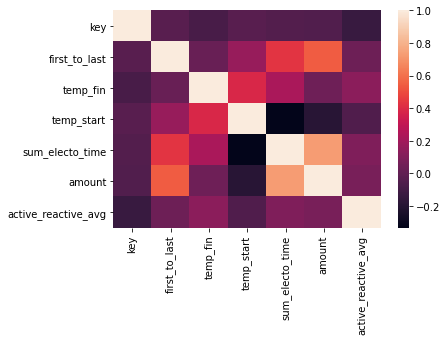

In [47]:
fig, ax = plt.subplots()
ax = sns.heatmap(data.corr())

In [49]:
c = data.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so.head(30))

temp_fin             first_to_last          0.022901
first_to_last        temp_fin               0.022901
temp_start           key                    0.025398
key                  temp_start             0.025398
                     first_to_last          0.026240
first_to_last        key                    0.026240
active_reactive_avg  first_to_last          0.038126
first_to_last        active_reactive_avg    0.038126
key                  sum_electo_time        0.042186
sum_electo_time      key                    0.042186
temp_fin             amount                 0.044848
amount               temp_fin               0.044848
key                  amount                 0.051218
amount               key                    0.051218
active_reactive_avg  temp_start             0.054653
temp_start           active_reactive_avg    0.054653
active_reactive_avg  amount                 0.073963
amount               active_reactive_avg    0.073963
temp_fin             key                    0.